# SF Crime Data Analysis and Visualization

02806 Assignment 2

Xinyi Liu  
Benjamin Starostka  
3/28/23

In [1]:
import folium
import numpy as np
import pandas as pd
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.sampledata.commits import data
from bokeh.transform import jitter
from bokeh.palettes import HighContrast3
from bokeh.plotting import figure, show
from bokeh.io import show
from bokeh.layouts import row, column
from bokeh.models import CustomJS, RadioButtonGroup
from bokeh.models import TabPanel, Tabs
from bokeh.plotting import figure, show
from bokeh.models import Paragraph
from bokeh.transform import dodge
from folium.plugins import HeatMap
from bokeh.palettes import Category20

output_notebook()

Loading BokehJS ...

# Introduction

San Francisco is a well-know metropolis, as the commercial, financial
and cultural center of North California in the USA, it has attracted a
massive amount of people migrated and lived in the city. With 815,201
residents [up to 2021](https://fred.stlouisfed.org/series/CASANF0POP),
the diverse population has made impactful contribution to the economic
of San Francisco. However, the wide range of socioeconomic challenges in
San Francisco also contributes to the high crime rate.

## Dataset

In this story, we will explore the San Francisco Police Department’s
(SFPD) [Incient Report
Dataset](https://data.sfgov.org/browse?category=Public+Safety) with the
time frame from January 2003 to May 2018.

This dataset is a collection of data on criminal incidents reported in
SF, which provides the information of `incident date`, `incident time`,
`incident category`, `police district`, `latitude`, `logitude`, etc. The
dataset contains 35 columns and more than 2 million records of crimes
within the timeframe. According to the data, there were 37 categories of
crimes recorded across San Francisco city.

## Abstract

The aim of this report is utilizing the techniques of data visualization
for the analytics of crime occured in San Francisco. The primary idea of
this data analysis study is to obtain the insights from the observation,
in order to evaluate the criminal situation for the past decades in San
Francisco, as well as help prevent potential crimes in the future. The
data analysis will be based on **Time-Series**, **Geographic** and
**Interative Visualization** respectively.

According to [SFNext
Index](https://www.sfchronicle.com/projects/2022/fixing-san-francisco-problems/crime),
with the exception of robberies, violent crime in San Francisco is below
average for large cities. In 2019 and 2020, San Francisco ranked in the
bottom half among major U.S. cities, with rates of 670 and 540 violent
crime incidents per 100,000 residents, respectively. Hence, we are
interested in how `Robbery` had increased the violent crime level in San
Francisco.

# Data Anlysis: Robberies in San Francisco

From January 2003 to December 2012, there were 35817 incidents of
robbery in San Francisco reported to the police, while there were 32786
incidents of robbery reported from 2013 to 2022 [(Data
source)](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783).
As an overview, the robbery rate has decreased by 8.5% since the decade
of 2003 to the last decade, however the number is not indicating a
significantly decrease, which reflects the robbery is still a key factor
that affect the level of crimes in San Francisco.

## Timeseries: How the occurrence of Robbery changed over the time?

If we divide the time of the incidents into hourly timeslots, it becomes
apparent that the number of robberies reaches its highest point between
2 and 3 pm and remains consistently high until 5 pm. After 5 pm, there
is a sharp decline during the evening, but a secondary peak occurs
between 1 and 2 am.Between 2 am and 2 pm, the number of incidents
increases steadily.

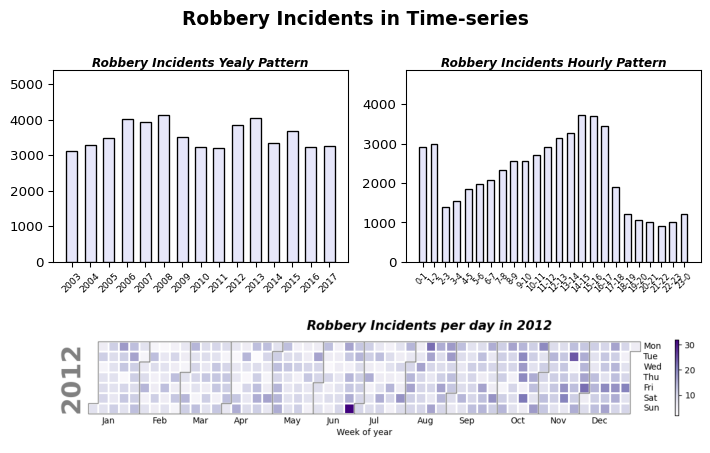

In [2]:
df_before_2018 = pl.read_csv('data/before_2018.csv').to_pandas()

focuscrimes = ['ROBBERY']

hour_of_day = [i for i in range(0,24)]
hourly_slots = {}
for i in range(len(hour_of_day)):
    if i+1 == len(hour_of_day):
        start = hour_of_day[i]
        end = hour_of_day[0]
        hourly_slots[start] = str(start) + "-" + str(end)
    else:
        start = hour_of_day[i]
        end = hour_of_day[i+1]
        hourly_slots[start] = str(start) + "-" + str(end)

df_before_2018["time_period"] = [hourly_slots[int(str(i).split(":")[0])] for i in list(df_before_2018['Hour'])]

yearly_pattern = df_before_2018.groupby(by=["Year", "Category"]).size().reset_index(name="Count")

yearly_pattern = yearly_pattern.loc[yearly_pattern['Category'].isin(focuscrimes)].reset_index(drop=True)

hourly_pattern = df_before_2018.groupby(by=["time_period", "Category"]).size().reset_index(name="Count")

hourly_pattern = hourly_pattern.loc[hourly_pattern['Category'].isin(focuscrimes)].reset_index(drop=True)


plt.figure(figsize=(7.5,5))
plt.suptitle("Robbery Incidents in Time-series" ,fontsize=14, y=1.0, fontweight='bold', color='black')

# Yealy trend
temp1 = yearly_pattern.loc[yearly_pattern['Category'] == 'ROBBERY'].reset_index(drop=True)
x = temp1["Year"]
y = temp1["Count"]
plt.subplot(2,2,1)
plt.title('Robbery Incidents Yealy Pattern', pad=-14, fontsize = 9, fontweight='bold', fontstyle="italic")
plt.bar(x, y, width=0.6, edgecolor="black", color='lavender')
plt.xticks(x, yearly_pattern['Year'].unique().tolist(), rotation=45, fontsize = 7)
plt.tight_layout()
plt.ylim(top=(np.max(y)+(np.max(y)*0.3)))

# Hourly trend
temp2 = hourly_pattern.loc[hourly_pattern['Category'] == 'ROBBERY'].reset_index(drop=True)
x = temp2["time_period"]
y = temp2["Count"]
plt.subplot(2,2,2)
plt.title('Robbery Incidents Hourly Pattern', pad=-14, fontsize = 9, fontweight='bold', fontstyle="italic")
plt.bar(x, y, width=0.6, edgecolor="black", color='lavender')
plt.xticks(x, hourly_slots.values(), rotation=45, fontsize = 6)
plt.tight_layout()
plt.ylim(top=(np.max(y)+(np.max(y)*0.3)))

# Calplot
img = mpimg.imread('Calplot_2012.png')
plt.subplot(2,1,2)
plt.imshow(img)
plt.axis('off')

plt.tight_layout()

From 2003 to 2017, we can see the incidents fluctuated accross years.
Specifically, in 2010 and 2011, it has a significant decreased from 2008
and 2009. The [Rand Corporation](https://www.rand.org/) studied this
phenomenon on a national level in 2010, concluding that the crime
prevention benefit of hiring more officers is well worth the cost.
[Reference](https://countyda.sccgov.org/sites/g/files/exjcpb1121/files/10-Year%20Combined%20CA%20Crime%20Stat%20Report.pdf)

However, there was a resurgence in incidents in 2012, with a noticeable
gap from the previous year. After analyzing the robbery incidents data
in 2012, we observed a marked increase in robberies on the final Sunday
in June in San Francisco. Further investigation revealed that this date
coincided with the San Francisco LGBT Pride Parade, which started at
Beale Street and Market Street and continued down to 8th Street.

## Map: Where does robbery most likely take place?

Let’s examine the robbery locations on June 24, 2012, during the Pride
Parade in San Francisco which typically occurs on Market
Street[(Reference:
Wikipedia)](https://en.wikipedia.org/wiki/San_Francisco_Pride#:~:text=The%20San%20Francisco%20Pride%20parade,until%20almost%204%3A00%20pm.).

In the visualization of the robbery incidents data on the day when the
Pride Parade occured, the three location marks Market Street, 8th Street
and Beala Street respectively. The red dots indicates the location of
the robberies taking place. It shows an obvious fact that in the 33
incidents recorded on 24 June 2012, most of the crimes happened in the
range of the routes that the parade covered.

In [3]:
df_before_2018 = pl.read_csv('data/before_2018.csv').to_pandas()

df_robbery = df_before_2018.loc[df_before_2018['Category']=="ROBBERY"]
df_robbery = df_robbery[df_robbery["Year"] == 2012]
df_robbery_pride = df_robbery[df_robbery['Date'] == '2012-6-24']

SF_map = folium.plugins.DualMap(location=[37.77919, -122.41914],
                    zoom_start = 12,
                    tiles = "openstreetmap")

constraint = (df_before_2018['Category'] == 'ROBBERY') & (df_before_2018['Year'] >= 2011) & (df_before_2018['Year'] <= 2012) & (df_before_2018['Resolution'] == "ARREST, BOOKED")
df_robbery_heat = df_before_2018.loc[constraint].reset_index(drop=True)


get_XY = list(zip(list(df_robbery_pride["Y"]), list(df_robbery_pride["X"])))

SF_map = folium.Map([37.77919, -122.41914], zoom_start=13, tiles = "openstreetmap")
folium.Marker([37.77351584799628, -122.42148577465927], popup="Market Street").add_to(SF_map)
folium.Marker([37.78907067508782, -122.3929690574588], popup="Beala Street").add_to(SF_map)
folium.Marker([37.77295458293956, -122.40701151351163], popup='8th Street').add_to(SF_map)

for x,y in get_XY:
    folium.CircleMarker([x, y],
                    radius=2,
                    color='red',
                    ).add_to(SF_map)


x_y_robbery = list(zip(list(df_robbery_heat["Y"]), list(df_robbery_heat["X"])))

HeatMap(x_y_robbery, min_opacity=0.35, overlay=True).add_to(SF_map)

SF_map

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_b9e2945e4bc7327de5f0d1b96cd49a66 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 <script src="https://cdn.jsdelivr.net/gh/python-visualization/folium@main/folium/templates/leaflet_heat.min.js"></script>
</head>
<body>
 
 
 <div class="folium-map" id="map_b9e2945e4bc7327de5f0d1b96cd49a66" ></div>
 
</body>
<script>
 
 
 var map_b9e2945e4bc7327de5f0d1b96cd49a66 = L.map(
 "map_b9e2945e4bc7327de5f0d1b96cd49a66",
 {
 center: [37.77919, -122.41914],
 crs: L.CRS.EPSG3857,
 zoom: 13,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_17db224facadf16f2fc15520c9989610 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_b9e2945e4bc7327de5f0d1b96cd49a66);
 
 
 var marker_8ff826f63884fb01f93cda2324dc5b79 = L.marker(
 [37.77351584799628, -122.42148577465927],
 {}
 ).addTo(map_b9e2945e4bc7327de5f0d1b96cd49a66);
 
 
 var popup_269ebecab096ec9c72516c6917756661 = L.popup({"maxWidth": "100%"});

 
 
 var html_96e54dd37e943d8e96a512c5aedf5696 = $(`<div id="html_96e54dd37e943d8e96a512c5aedf5696" style="width: 100.0%; height: 100.0%;">Market Street</div>`)[0];
 popup_269ebecab096ec9c72516c6917756661.setContent(html_96e54dd37e943d8e96a512c5aedf5696);
 
 

 marker_8ff826f63884fb01f93cda2324dc5b79.bindPopup(popup_269ebecab096ec9c72516c6917756661)
 ;

 
 
 
 var marker_cfd8b4c0b7e9c069ab9b9e582cf3aee7 = L.marker(
 [37.78907067508782, -122.3929690574588],
 {}
 ).addTo(map_b9e2945e4bc7327de5f0d1b96cd49a66);
 
 
 var popup_0eefbf7e7b271c3b2c1d1f12654a07f3 = L.popup({"maxWidth": "100%"});

 
 
 var html_a19438c04515330289d2f73ee995d70a = $(`<div id="html_a19438c04515330289d2f73ee995d70a" style="width: 100.0%; height: 100.0%;">Beala Street</div>`)[0];
 popup_0eefbf7e7b271c3b2c1d1f12654a07f3.setContent(html_a19438c04515330289d2f73ee995d70a);
 
 

 marker_cfd8b4c0b7e9c069ab9b9e582cf3aee7.bindPopup(popup_0eefbf7e7b271c3b2c1d1f12654a07f3)
 ;

 
 
 
 var marker_db9c232fe39d4b5e9bc0e4ce43fb82cf =

The incidence of robbery is relatively high in the near Market Street,
indicating that criminals are more prone to commit robbery in crowded
areas, thus increasing their chances of escape. Additionally, the
buildings and blocks in the Market Street area are more densely packed,
offering additional cover and refuge for criminals.

This observation also aligns with the result of the heatmap regarding
robbery occurrence in 2011 and 2012, as the map above indicates. It
reveals the fact that areas with a high concentration of stores and a
large population, along with a complex urban infrastructure, are more
susceptible to robbery incidents.

However, despite the fact that the Tenderloin district where Market
Street located had the highest number of robbery incidents, the data
implies that it was not the most active police district. This fact can
be counted to the assumption that there was a lack of police power
resources in Tenderloin district.

## Interative Visualization: How does the police

In [4]:
dataset = pl.read_csv('data/before_2018.csv')
data = (
    dataset
    .groupby(['Hour', 'PdDistrict']).agg(pl.count())
    .with_columns((pl.col('Hour')/pl.col('count')).alias('normalized'))
    .sort(pl.col('Hour'))
)
data = data.pivot(index = 'Hour', columns = ['PdDistrict'], values = ['normalized'])

districts = set(['RICHMOND', 'TARAVAL', 'MISSION', 'INGLESIDE', 'SOUTHERN', 'NORTHERN', 'TENDERLOIN', 'CENTRAL', 'BAYVIEW', 'PARK'])

source = ColumnDataSource(data.to_pandas())
hours = data['Hour'].unique().to_list()
hours = sorted(hours)
p = figure(title="Police District", x_axis_label='Hour of the day', y_axis_label='Percentage Frequency', 
           x_range = FactorRange(factors=[str(hour) for hour in hours]))
bar = {}
for indx, i in enumerate(districts):
    bar[i] = p.vbar(x="Hour", top=i, width=0.3, 
                    source=source, legend_label=i, muted_alpha=0.2, muted=False, color=Category20[14][indx])
p.legend.title = "Category"
p.legend.location = "top_left"
p.legend.click_policy = "mute"
p.legend.label_text_color = "black"
p.legend.title_text_color = "black"
show(p)

# Conclusion

As the analysis presented, we had investigated into the robbery
incidents in San Francisco and put the focus on discussing the situation
from 2008 to 2012 based on time series. Particularly, by looking into
the calendar plots across 2003 to 2017, it briefly showed that the
incidents of robbery usually peaks at summer time. By visualizing the
incidents of robbery on the map, we could conclude that the busiest city
center tend to be the place that crimes are more likely happen. However,
the activities of police related to the districts does not show a
positive correlation with the numbers of incidents.